# Univariate Colorbars

This Jupyter notebook tutorial focuses on working with pycolorbar univariate colorbars. 

Univariate colorbars are essential for visualizing scalar data in a meaningful way. 
pycolorbar holds a registry of univariate colorbars, making it easy to work with a consistent set of colorbars across different visualizations.

In this tutorial, we'll explore how to utilize the pycolorbar package to register, manage, validate, and visualize univariate colorbars.

### Introduction

The pycolorbar univariate colorbar configuration is composed of three main components: `cmap`, `norm` and `cbar`.

Each component plays a critical role in defining the appearance and behavior of colorbars used to represent scalar data.

Now let's have a look on how to define, manipulate, validate and register the colorbars configurations with pycolorbars. 
First of all, let's start by importing the necessary functions and libraries

In [1]:
import os
import pycolorbar
from pprint import pprint
pycolorbar.register_colormaps(os.path.join(pycolorbar.etc_directory, "colormaps"))

### Listing Available Colorbars
To get started, let's explore what colorbars are available in the registry:

In [2]:
# List all registered colorbars in pycolorbar
available_colorbars = pycolorbar.colorbars.names
print("Available colorbars:", available_colorbars)

Available colorbars: []


### Registering Colorbars Configurations YAML files
You can add your colorbars to the registry for easy access. Here's how to register all colorbars configurations YAML files located within a specified directory:

In [3]:
# Specify the directory containing colorbars configurations YAML files

# dst_dir = "/path/to/your/colorbar/configs"

dst_dir = os.path.join(pycolorbar.etc_directory, "colorbars") # example colorbars directory in pycolorbar

In [4]:
# Register all colorbars from the directory
pycolorbar.register_colorbars(dst_dir)

# Verify the colorbars are registered
print("Colormaps after registration:", pycolorbar.colorbars.names)

Colormaps after registration: ['category_colorbar', 'combined_colorbar', 'continuous_colorbar', 'continuous_log_colorbar', 'discrete_colorbar', 'probability', 'referenced_colorbar']


If when registering new colorbars you are overwriting pre-registered colorbars, by default pycolorbar raise a warning: 

In [5]:
# Register all colorbars from the directory
pycolorbar.register_colorbars(dst_dir)

To silence the warning, you can specify the argument `verbose=False`:

In [6]:
# Register all colorbars from the directory
pycolorbar.register_colorbars(dst_dir, verbose=False)

To instead avoid overwriting, you can specify the argument `force=False`. If an existing colorbar is gonna to be overwritten, an informative error is raised.

In [7]:
# Register all colormaps from the directory

#pycolorbar.register_colormaps(dst_dir, force=False)

If you aim to register only a specific colorbar configurations YAML file, you can use the `pycolorbars.register_colorbar` function:

In [8]:
cbar_dicts_filepath = os.path.join(pycolorbar.etc_directory, "colorbars", "example_colorbar_configurations.yaml")
pycolorbar.register_colorbar(cbar_dicts_filepath)
print("Registered colorbars:", pycolorbar.colorbars.names)

Registered colorbars: ['category_colorbar', 'combined_colorbar', 'continuous_colorbar', 'continuous_log_colorbar', 'discrete_colorbar', 'probability', 'referenced_colorbar']


### Unregister colorbars

If you need to remove a colorbar from the registry, you can use the `unregister` method:

In [9]:
# Unregister a specific colorbar
pycolorbar.colorbars.unregister("discrete_colorbar")

# Check the current list of registered colorbars
print("Colormaps after unregistering 'discrete_colorbar':", pycolorbar.colorbars.names)

Colormaps after unregistering 'discrete_colorbar': ['category_colorbar', 'combined_colorbar', 'continuous_colorbar', 'continuous_log_colorbar', 'probability', 'referenced_colorbar']


### Reset the colorbar registry

You can reset the entire colorbar registry with: 

In [10]:
pycolorbar.colorbars.reset()
print("Colorbars after resetting the registry:", pycolorbar.colorbars.names)

Colorbars after resetting the registry: []


Now let's register again the sample colorbars configurations file to proceed with the tutorial:

In [11]:
pycolorbar.register_colorbar(cbar_dicts_filepath)
print("Colorbars after resetting the registry:", pycolorbar.colorbars.names)

Colorbars after resetting the registry: ['category_colorbar', 'combined_colorbar', 'continuous_colorbar', 'continuous_log_colorbar', 'discrete_colorbar', 'probability', 'referenced_colorbar']


### Read colorbar configuration files

Now let's have a look on how to read the colorbar YAML files into python dictionaries.

The `read_cmap_dicts` function enable to read the "raw" colorbar dictionaries saved to a YAML file.

In [12]:
from pycolorbar.settings.colorbar_io import read_cbar_dicts

In [13]:
# Read the raw colorbars configurations file
cbar_dicts = read_cbar_dicts(cbar_dicts_filepath)

# List the name of the colorbars defined in the dictionary
print(list(cbar_dicts))

['discrete_colorbar', 'category_colorbar', 'continuous_colorbar', 'referenced_colorbar', 'continuous_log_colorbar', 'combined_colorbar', 'probability']


Now, let's visualize the raw dictionary of one of the available colorbar configuration:

In [14]:
name = "continuous_colorbar"
pprint(cbar_dicts[name])

{'auxiliary': {'category': ['example', 'continuous']},
 'cbar': {'extend': 'both', 'extendfrac': 0.05, 'label': 'Continuous Colorbar'},
 'cmap': {'bad_alpha': 0.5, 'bad_color': 'none', 'name': 'Spectral_r'},
 'norm': {'name': 'Norm', 'vmax': 50, 'vmin': 10}}


The validated colorbar dictionary can be retrieve directly from the colorbars registry. 
Note how some fields have been added with sensible defaults value.

In [15]:
name = "continuous_colorbar"
cbar_dict = pycolorbar.colorbars.get_cbar_dict(name)
pprint(cbar_dict)

{'auxiliary': {'category': ['example', 'continuous']},
 'cbar': {'extend': 'both',
          'extendfrac': 0.05,
          'extendrect': False,
          'label': 'Continuous Colorbar'},
 'cmap': {'bad_alpha': 0.5,
          'bad_color': 'none',
          'n': None,
          'name': 'Spectral_r',
          'over_alpha': None,
          'over_color': None,
          'under_alpha': None,
          'under_color': None},
 'norm': {'clip': False, 'name': 'Norm', 'vmax': 50.0, 'vmin': 10.0}}


### Validate colorbar dictionaries
If you aims to define your own colorbar configuration dictionary, you can validate it with:

In [16]:
validated_cbar_dict = pycolorbar.validate_cbar_dict(cbar_dict, name="continuous_colorbar")
pprint(cbar_dict)

{'auxiliary': {'category': ['example', 'continuous']},
 'cbar': {'extend': 'both',
          'extendfrac': 0.05,
          'extendrect': False,
          'label': 'Continuous Colorbar'},
 'cmap': {'bad_alpha': 0.5,
          'bad_color': 'none',
          'n': None,
          'name': 'Spectral_r',
          'over_alpha': None,
          'over_color': None,
          'under_alpha': None,
          'under_color': None},
 'norm': {'clip': False, 'name': 'Norm', 'vmax': 50.0, 'vmin': 10.0}}


### Add colorbar dictionary to the registry

The colorbar registry `add_cbar_dict` allows to temporary add a single colorbar configuration to the registry.

In [17]:
pycolorbar.colorbars.add_cbar_dict(cbar_dict, name="my_custom_colorbar")

In [18]:
# Let's check the custom colorbar dictionary has been added to the registry
assert "my_custom_colorbar" in pycolorbar.colorbars

### Reference colorbar configurations
If you have multiple variable (which are named differently) but that should be rendered in the same way, you can define colorbar configurations that
refers to the colorbar configuration name that actually provides the colorbar specifics. 
What you need to do is to just specify the name of the `reference`colorbar as follow: 

In [19]:
cbar_dict = {"reference": "discrete_colorbar"} 
pycolorbar.colorbars.add_cbar_dict(cbar_dict, name="my_reference_colorbar")

### Validate the colorbars in the registry
To validate the registered colorbar dictionaries you can use the `pycolorbar.colorbars.validate` method.

In [20]:
pycolorbar.colorbars.validate("my_reference_colorbar") # validate a specific colorbar
pycolorbar.colorbars.validate("my_custom_colorbar") # validate a specific colorbar
pycolorbar.colorbars.validate() # validate all colorbars in the registry

### Write registered colorbars to configuration YAML files
A colorbars YAML configuration file can contains the the definition of multiple colorbars. 

In contrast to the pycolorbar **colormap configuration YAML file**  where the filename gives the name to the colormap, the name of a **colorbars configurations YAML file**  does not matter.
 
You can save all registered colorbar configurations to a single YAML file to disk with:

In [21]:
filepath = "/tmp/all_colorbars_configuration.yaml"
pycolorbar.colorbars.to_yaml(filepath=filepath, force=True)

Or alternatively, you can write to disk a subset of the registered colorbar configurations by specifying the `names`:

In [22]:
filepath = "/tmp/subset_colorbars_configuration.yaml"
names = ["discrete_colorbar", "my_reference_colorbar"]
pycolorbar.colorbars.to_yaml(names=names, filepath=filepath, force=True)

In [23]:
# Let's check the written YAML file
cbar_dicts = read_cbar_dicts(filepath)
pprint(cbar_dicts)

{'discrete_colorbar': {'auxiliary': {'category': ['example', 'discrete']},
                       'cbar': {'extend': 'max',
                                'extendfrac': 'auto',
                                'extendrect': False,
                                'label': 'Discrete Colorbar'},
                       'cmap': {'bad_alpha': 0.2,
                                'bad_color': 'gray',
                                'n': 16,
                                'name': 'STEPS-MCH',
                                'over_alpha': None,
                                'over_color': 'darkred',
                                'under_alpha': None,
                                'under_color': 'none'},
                       'norm': {'boundaries': [0.08,
                                               0.16,
                                               0.25,
                                               0.4,
                                               0.63,
                           

### Retrieve the colormap a colorbar configuration

To retrieve the matplotlib colormap of a colorbar configuration, you can call the `get_cmap` method of the colorbar registry:

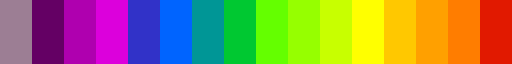

In [24]:
cmap = pycolorbar.colorbars.get_cmap("discrete_colorbar")
cmap

### Visualize the colorbar

You can also visualize the colorbar with:

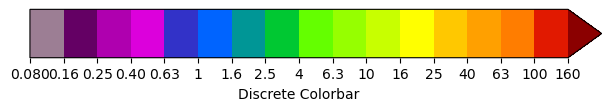

In [25]:
pycolorbar.show_colorbar("discrete_colorbar")

### List and visualize colorbars by category 
pycolorbar provides a way to retrieve a custom selection of registered colorbars according to the categories specified in the `auxiliary/category` field of the colorbar configuration.

For example, the `"discrete_colorbar"` has the categories `["discrete"]` indicating the type and use of the colorbar.

In [26]:
cbar_dict = pycolorbar.colorbars.get_cbar_dict("discrete_colorbar")
pprint(cbar_dict)

{'auxiliary': {'category': ['example', 'discrete']},
 'cbar': {'extend': 'max',
          'extendfrac': 'auto',
          'extendrect': False,
          'label': 'Discrete Colorbar'},
 'cmap': {'bad_alpha': 0.2,
          'bad_color': 'gray',
          'n': 16,
          'name': 'STEPS-MCH',
          'over_alpha': None,
          'over_color': 'darkred',
          'under_alpha': None,
          'under_color': 'none'},
 'norm': {'boundaries': [0.08,
                         0.16,
                         0.25,
                         0.4,
                         0.63,
                         1.0,
                         1.6,
                         2.5,
                         4.0,
                         6.3,
                         10.0,
                         16.0,
                         25.0,
                         40.0,
                         63.0,
                         100.0,
                         160.0],
          'clip': False,
          'extend': 'neither

With the `available_colorbars` function we can retrieve the list of colorbars belonging to a given category: 

In [27]:
pycolorbar.available_colorbars(category="discrete")

['discrete_colorbar', 'my_reference_colorbar']

With `exclude_referenced=True` it is possible to list only the actual colorbar configurations that do not point to another configuration: 

In [28]:
pycolorbar.available_colorbars(category="discrete", exclude_referenced=True)

['discrete_colorbar']

while with `show_colorbars` we can visualize a selection of registered pycolorbar colorbars:

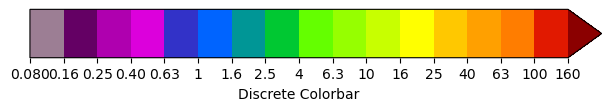

In [29]:
pycolorbar.show_colorbars(category="discrete")

or all the registered pycolorbar colorbars:

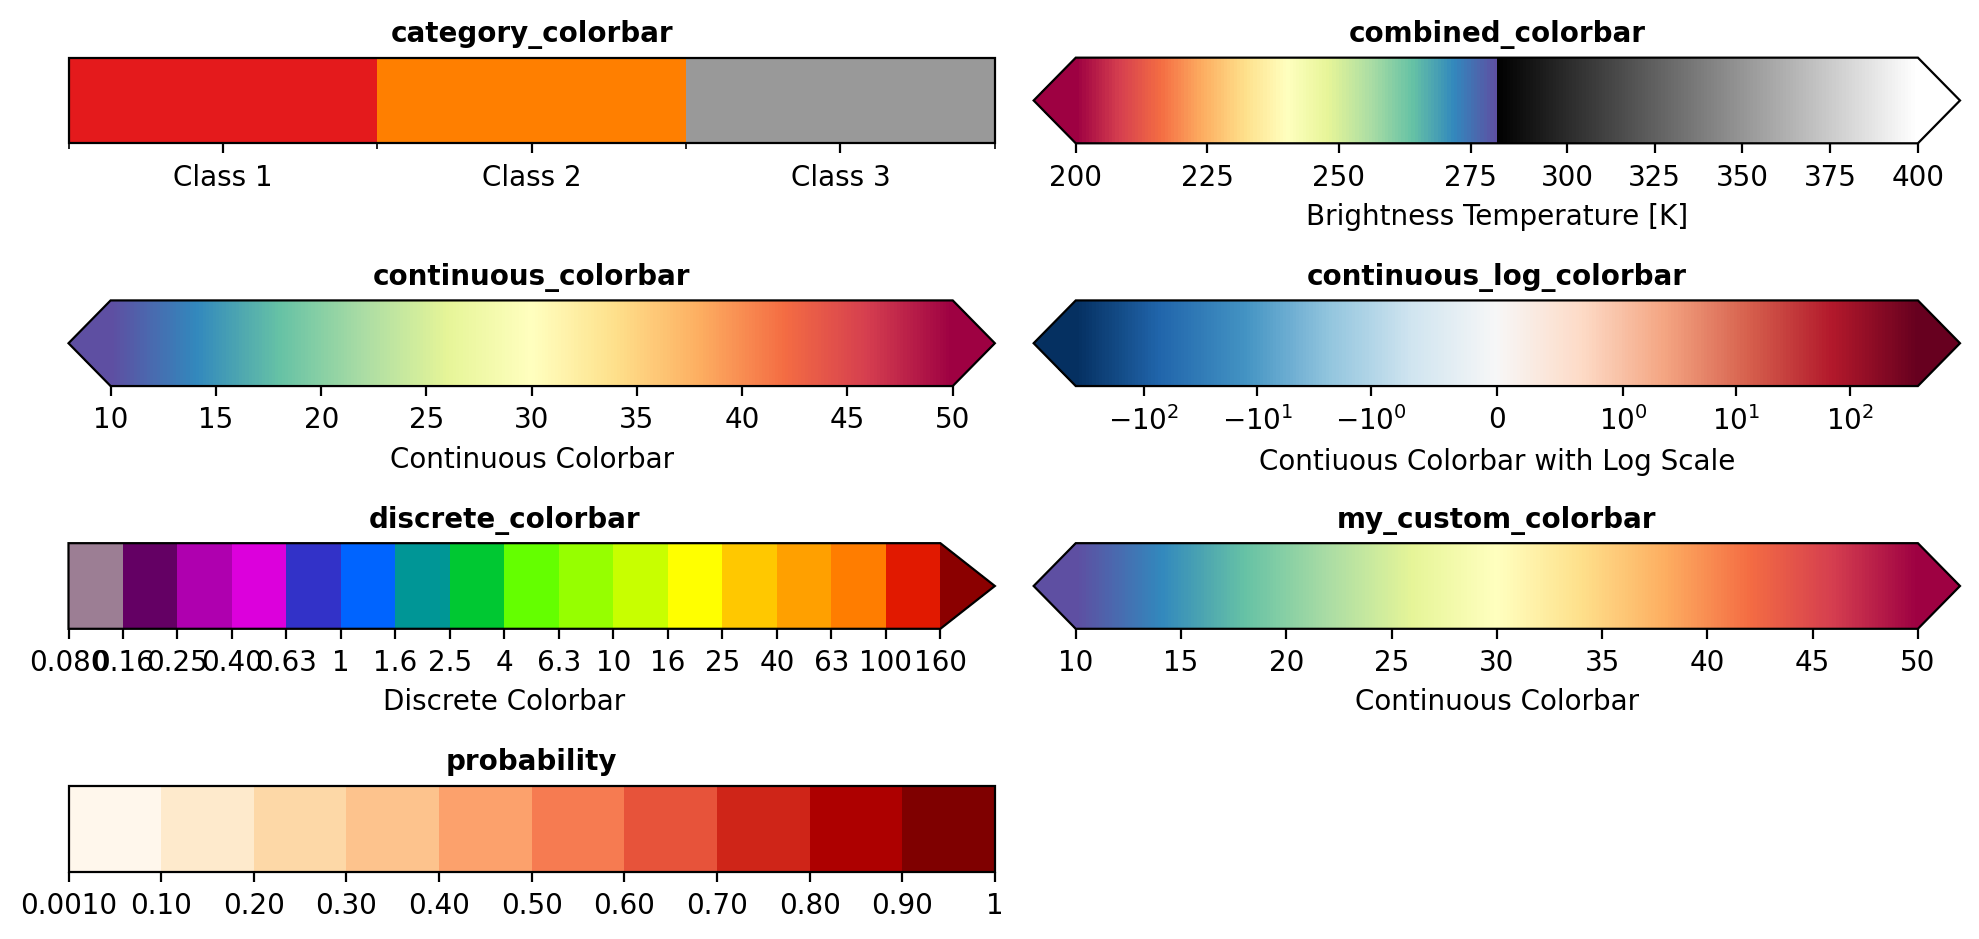

In [30]:
pycolorbar.show_colorbars()

It's also possible to display all the colorbars that reference to another colorbar with:

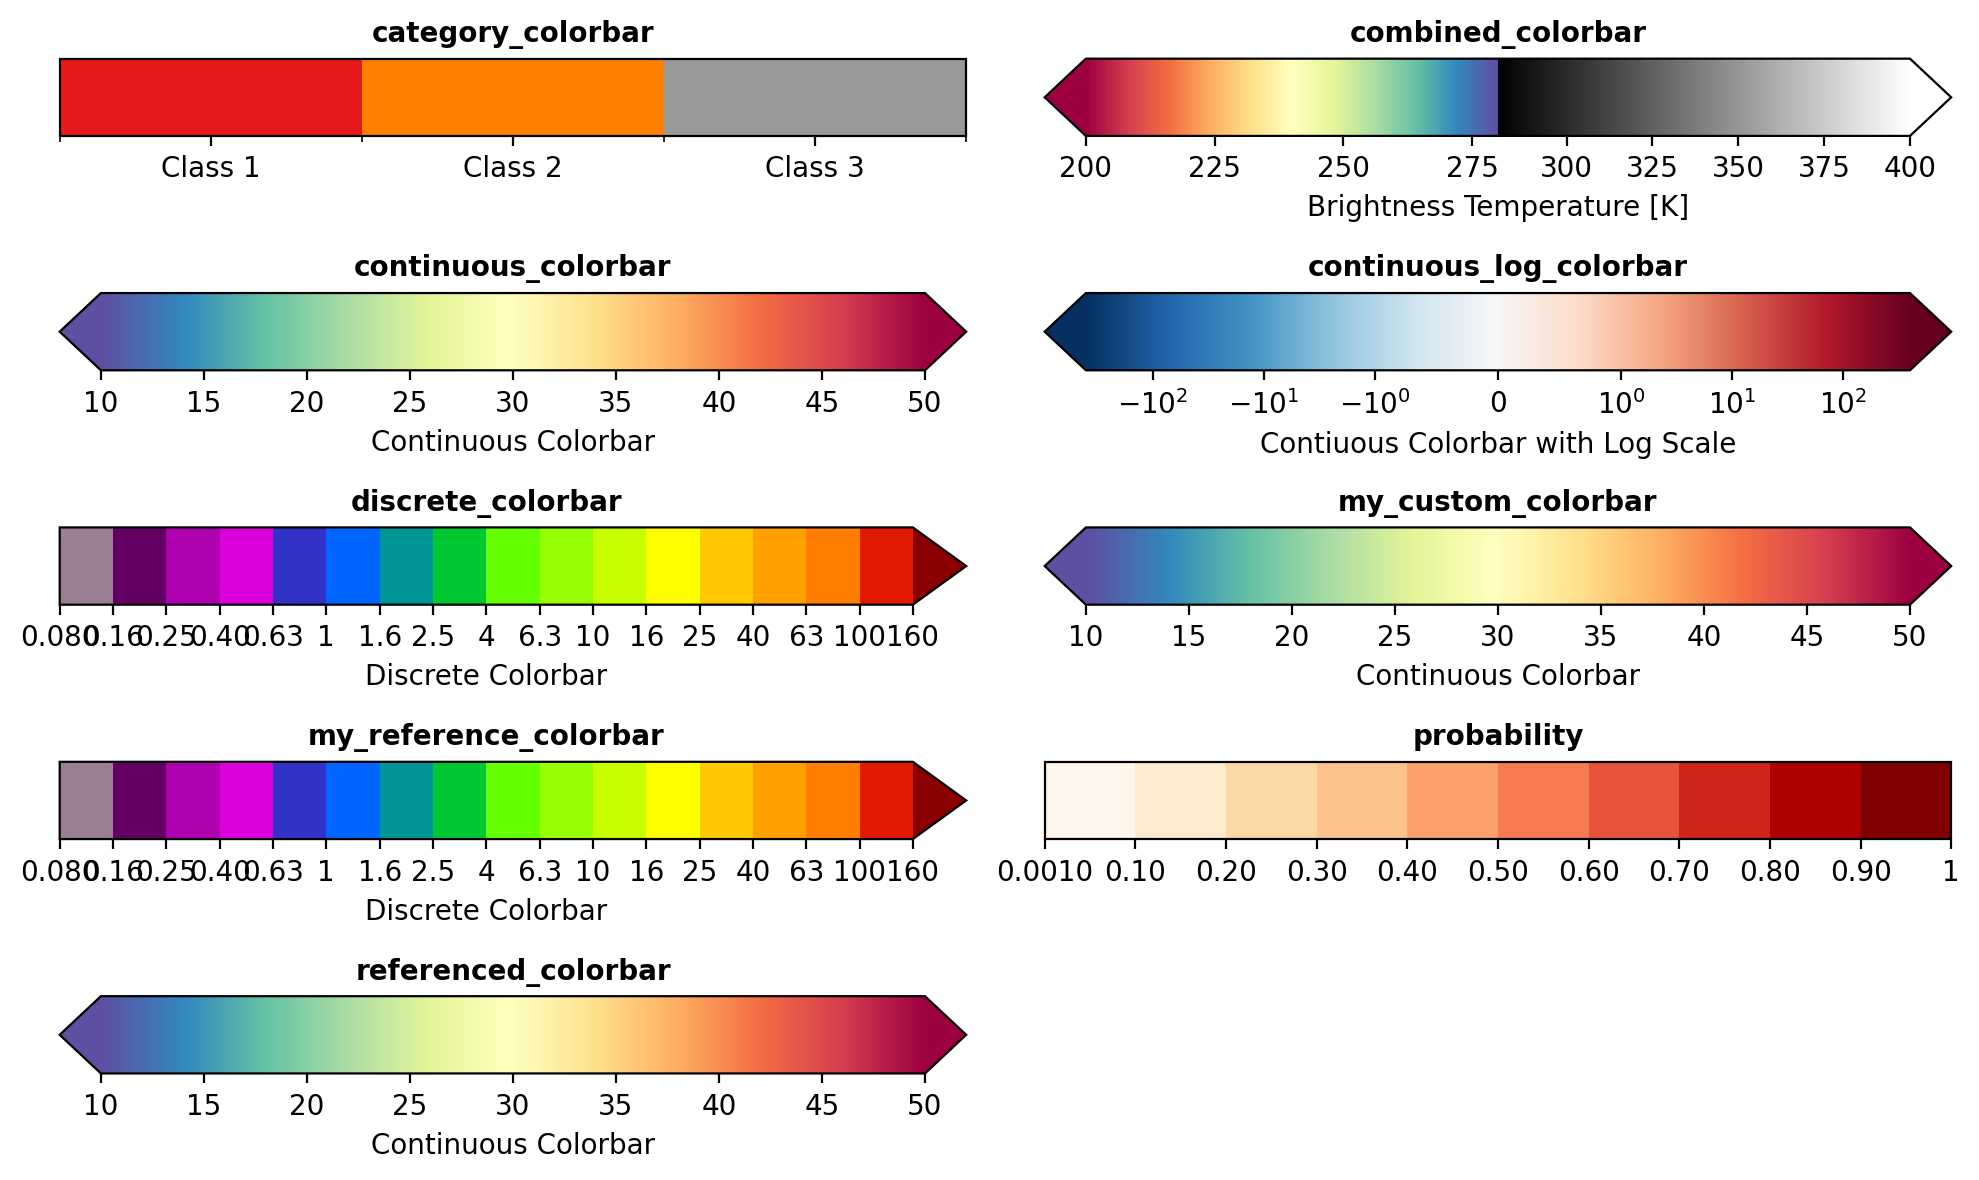

In [31]:
pycolorbar.show_colorbars(exclude_referenced=False)

When you define your colorbars, please consider to add the relevant categories to the `auxiliary/category`field of the colorbar configuration !

### Edit pycolorbars colorbars defaults on-the-fly

pycolorbar offers a way to directly experiment how the default colorbar configuration is modified based on user arguments.
Here below we provide some examples:

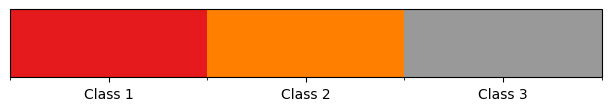

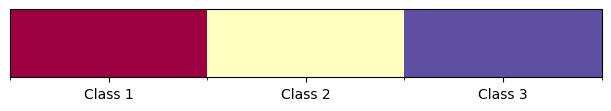

The default pycolorbar norm is a <class 'matplotlib.colors.BoundaryNorm'> and does not accept 'vmin' and 'vmax'.
 Switching the norm to Normalize(vmin=0, vmax=3) !


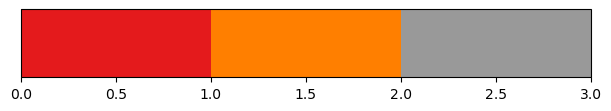

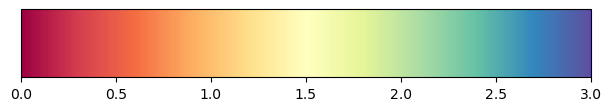

In [39]:
from matplotlib.colors import Normalize
pycolorbar.show_colorbar("category_colorbar")
pycolorbar.show_colorbar("category_colorbar", user_plot_kwargs={"cmap": "Spectral"})  # change colormap, labels conserved !
pycolorbar.show_colorbar("category_colorbar", user_plot_kwargs={"vmin": 0, "vmax": 3}) # change norm, but colormap conserved !
pycolorbar.show_colorbar("category_colorbar", user_plot_kwargs={"cmap": "Spectral", "norm": Normalize(vmin=0, vmax=3)})

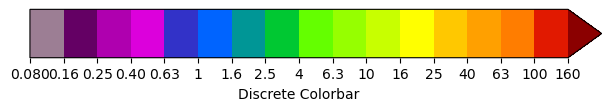

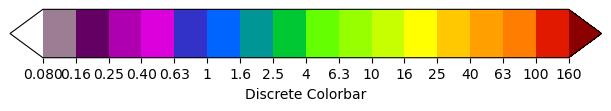

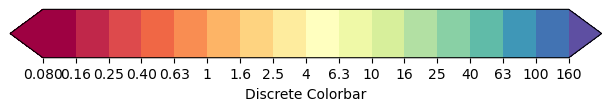

In [40]:
pycolorbar.show_colorbar("discrete_colorbar")
pycolorbar.show_colorbar("discrete_colorbar", user_cbar_kwargs={"extend": "both"})
pycolorbar.show_colorbar("discrete_colorbar", user_plot_kwargs={"cmap": "Spectral"}, user_cbar_kwargs={"extend": "both"})

### Retrieve matplotlib/xarray plot kwargs

As you have just seen here above, pycolorbar offer a way to define default colorbars configurations that can be modified on-the-fly based on additional user arguments.
Here below, we show how to use the `get_plot_kwargs` to easily customize plots with `matplotlib`, `cartopy`, `xarray` and `geopandas`:

In [71]:
import numpy as np
import matplotlib.pyplot as plt 
# Let's simulate a 2D array with linear gradients
width = 100
height = 100
# Horizontal gradient
horizontal_gradient = np.linspace(0, 100, width)
image_horizontal = np.tile(horizontal_gradient, (height, 1))
# Vertical gradient
vertical_gradient = np.linspace(0, 100, height).reshape(-1, 1)
image_vertical = np.tile(vertical_gradient, (1, width))
# Diagonal gradient by averaging horizontal and vertical gradients
image = (image_horizontal + image_vertical) / 2

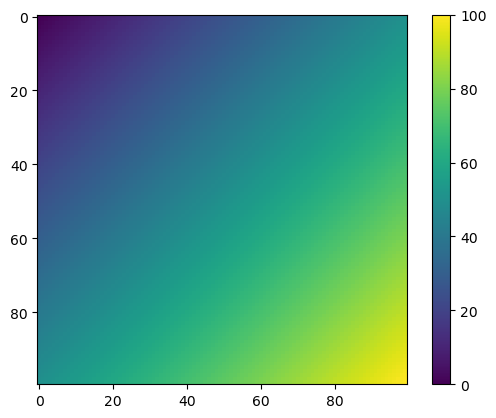

In [72]:
plt.imshow(image)
plt.colorbar()

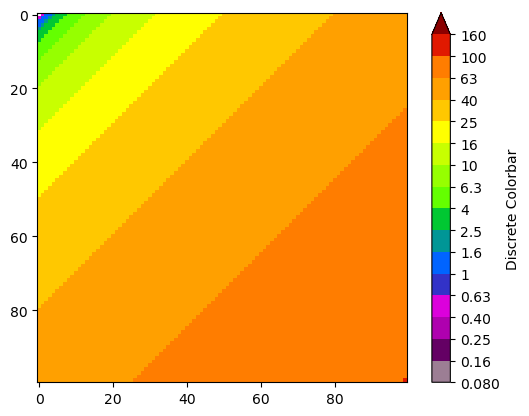

In [73]:
# Retrieve plot and colorbar kwargs 
plot_kwargs, cbar_kwargs = pycolorbar.get_plot_kwargs(name="discrete_colorbar")
plt.imshow(image, **plot_kwargs)
ticklabels = cbar_kwargs.pop("ticklabels")
cbar = plt.colorbar(**cbar_kwargs)
cbar.set_ticklabels(ticklabels)

The default pycolorbar norm is a <class 'matplotlib.colors.BoundaryNorm'> and does not accept 'vmin' and 'vmax'.
 Switching the norm to Normalize(vmin=0, vmax=100) !


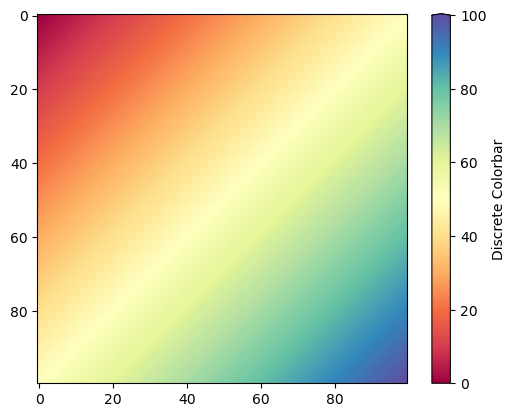

In [74]:
# Retrieve plot and colorbar kwargs (with custom kwargs)
plot_kwargs, cbar_kwargs = pycolorbar.get_plot_kwargs(name="discrete_colorbar", user_plot_kwargs={"cmap": "Spectral", "vmin": 0, "vmax": 100})
plt.imshow(image, **plot_kwargs)
plt.colorbar(**cbar_kwargs)